# Week 3 - Data manipulations

Week 3 video (4_mnist_basics.ipynb notebook) builds a simple baseline model to recognize digits 3 and 7.
In doing so, Jeremy reviews many useful concepts including arrays, tensors and lists. He also points to handy coding tips.

In today's session we'll do a similar exercise with different data. 
This example will help us revise some important concepts and solve a couple of challenges along the way.

If you are confident with tensor manipulations, feel free to go ahead and load data for a more complex task, e.g., object detection or your future project.


In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

# Cats vs dogs manual data loading

Week 3 video (4_mnist_basics.ipynb notebook) builds a simple baseline model to recognize digits 3 and 7.
In doing so, Jeremy reviews many useful concepts including arrays, tensors and lists. He also points to useful coding tips.

In today's session we'll do a similar exercise with different data. 
This example will help us revise some important concepts and understand how data is processed under the hood.


In [3]:
# Load cats vs dogs data from fastai
# hint: use URLs and untar_data

path = untar_data(URLs.PETS)

It is important to understand the data before building a model.

* What is the structure of the data? 
* How are the labels are stored?
* Is there a predefined train/valid/test split or we should split the data?


In [4]:
# where is the data downloaded?
path

Path('/root/.fastai/data/oxford-iiit-pet')

`path` is not just a string storing the directory where you data was downloaded. It is a `PosixPath` - a Python standard library. `PosixPath` have a bunch of useful methods.

In [5]:
Path.BASE_PATH = path

**Q:** Do you know how to load data in the folder of your choice?

In [6]:
# Display the content of downloaded data:

path.ls()

(#2) [Path('annotations'),Path('images')]

In [7]:
# How many images are in the dataset?

(path/'images').ls()

(#7393) [Path('images/leonberger_80.jpg'),Path('images/chihuahua_42.jpg'),Path('images/chihuahua_92.jpg'),Path('images/British_Shorthair_205.jpg'),Path('images/shiba_inu_44.jpg'),Path('images/Bengal_145.jpg'),Path('images/wheaten_terrier_184.jpg'),Path('images/shiba_inu_83.jpg'),Path('images/newfoundland_133.jpg'),Path('images/basset_hound_4.jpg')...]

We'll use Jeremy's example of digit classifier in 04_mnist_basics.ipynb as a guide and do similar steps for cats vs dogs.

In [8]:
# Load a list of filenames for cats
# Hint: what is the difference between mnist and dogs/cats use case?

all_path = (path/'images').ls().sorted()
cats_path = L([p for p in all_path if p.name[0].isupper()])
cats_path

(#2403) [Path('images/Abyssinian_1.jpg'),Path('images/Abyssinian_10.jpg'),Path('images/Abyssinian_100.jpg'),Path('images/Abyssinian_100.mat'),Path('images/Abyssinian_101.jpg'),Path('images/Abyssinian_101.mat'),Path('images/Abyssinian_102.jpg'),Path('images/Abyssinian_102.mat'),Path('images/Abyssinian_103.jpg'),Path('images/Abyssinian_104.jpg')...]

In [9]:
# Load a list of filenames for dogs
dogs_path = L([p for p in all_path if not p.name[0].isupper()])
dogs_path

(#4990) [Path('images/american_bulldog_10.jpg'),Path('images/american_bulldog_100.jpg'),Path('images/american_bulldog_101.jpg'),Path('images/american_bulldog_102.jpg'),Path('images/american_bulldog_103.jpg'),Path('images/american_bulldog_104.jpg'),Path('images/american_bulldog_105.jpg'),Path('images/american_bulldog_106.jpg'),Path('images/american_bulldog_107.jpg'),Path('images/american_bulldog_108.jpg')...]

In [10]:
# Add a sanity check that no entry are lost
assert len(all_path) == len(cats_path) + len(dogs_path)

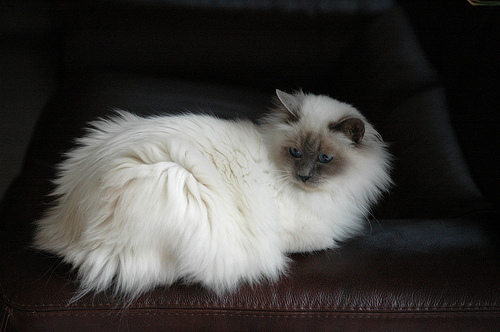

In [11]:
# Display one random image. Check how different our cat image from a digit image. 

cat = Image.open(random.choice(cats_path))
cat

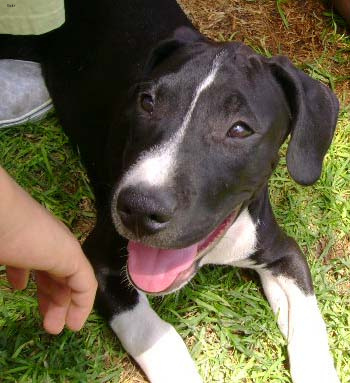

In [12]:
# Display random dog image
dog = Image.open(random.choice(dogs_path))
dog

In [13]:
# Display image size
cat.shape  # (height, width)

(332, 500)

In [14]:
# Convert cat image to an array and check the shape
array(cat).shape

(332, 500, 3)

In [15]:
# Convert cat image to a tensor and check the shape
tensor(cat).shape

torch.Size([332, 500, 3])

In [16]:
# Display a slice of cat array:
# display top left corner 10x10 pixels
array(cat)[100:110, 100:110, 0]

# display bottom right corner 10:10 pixels
array(cat)[-10:,-10:, 0]

array([[21, 27, 27, 21, 22, 23, 22, 21, 18, 20],
       [22, 22, 21, 23, 25, 22, 24, 24, 20, 21],
       [24, 24, 20, 25, 25, 19, 23, 26, 24, 23],
       [22, 28, 27, 30, 26, 22, 20, 25, 24, 23],
       [27, 27, 25, 31, 23, 21, 22, 25, 24, 24],
       [22, 26, 25, 28, 23, 33, 27, 27, 23, 23],
       [27, 27, 28, 28, 20, 24, 22, 18, 20, 20],
       [25, 27, 27, 24, 26, 22, 25, 22, 23, 22],
       [25, 24, 26, 22, 30, 21, 30, 23, 23, 24],
       [29, 19, 24, 22, 27, 25, 24, 19, 17, 17]], dtype=uint8)

In [17]:
# Read a list of cat images (cats_path) to a list of tensors
cat_tensors = [tensor(Image.open(c).resize((200,200)).convert('RGB')) for c in cats_path if c.suffix!='.mat']

In [18]:
# Read a list of dog images (dogs_path) to a list of tensors
dogs_tensors = [tensor(Image.open(d).resize((200,200)).convert('RGB')) for d in dogs_path]

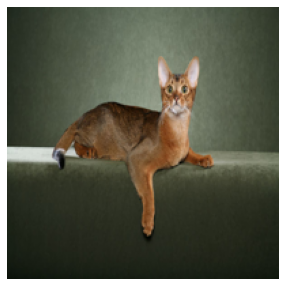

In [19]:
# Show ramdon cat image
show_image(cat_tensors[0])

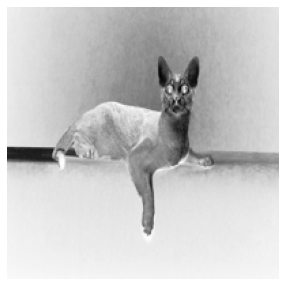

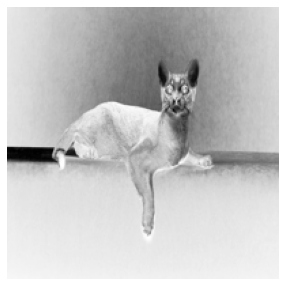

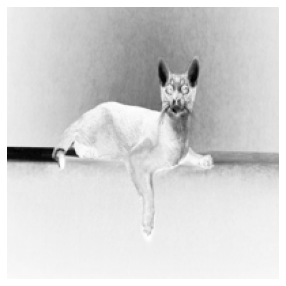

In [20]:
# Display separately each channel (RGB) for one image
for i in range(3):
    show_image(cat_tensors[0][..., i])

In [21]:
# Stack a list of tensors for cats into one tensor:
stacked_cats = torch.stack(cat_tensors).float()/255
# Stack a list of tensors for dogs into one tensor:
stacked_dogs = torch.stack(dogs_tensors).float()/255

In [23]:
# Display shapes of tensors:
stacked_cats.shape, stacked_dogs.shape

(torch.Size([2400, 200, 200, 3]), torch.Size([4990, 200, 200, 3]))

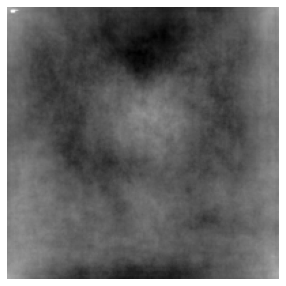

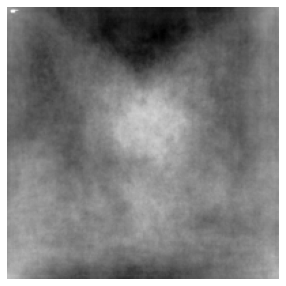

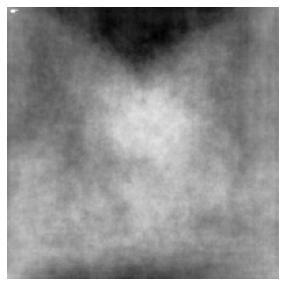

In [24]:
# Show mean image for cats and dots.
# Tip: show each channel separately
for i in range(3):
  show_image(stacked_cats.mean(0)[..., i])

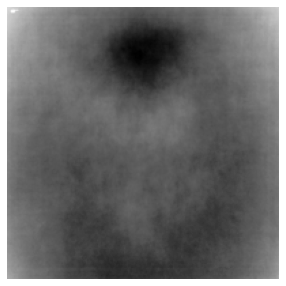

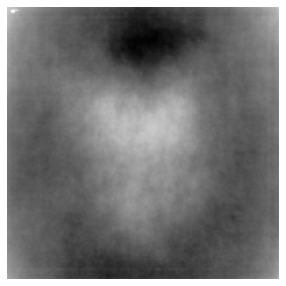

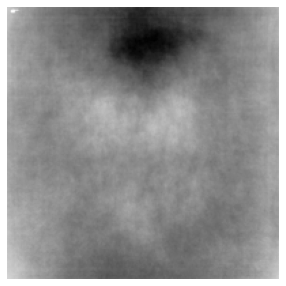

In [25]:
for i in range(3):
  show_image(stacked_dogs.mean(0)[..., i])

In [26]:
stacked_cats.shape

torch.Size([2400, 200, 200, 3])

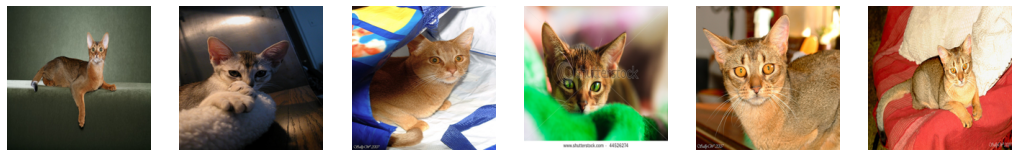

In [27]:
show_images(stacked_cats[:6])

This example demonstrates that loading data manually (without using fastai or any other high level framework) is long and cumberstone process.

**Q:** Name at least three points where we cut corners and made some simplification?

In [28]:
# Load  cats/dogs dataset with DataBlock
def is_cat(x): return x.name[0].isupper()
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=1),
    get_y=is_cat,
    item_tfms=Resize(128),
    batch_tfms=[Normalize.from_stats(*imagenet_stats)]
)

In [29]:
path = untar_data(URLs.PETS)/'images'

dls = pets.dataloaders(path)

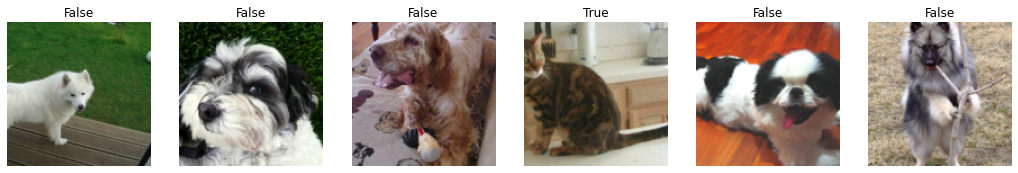

In [30]:
# Display a training batch
dls.train.show_batch(max_n=6, nrows=1)

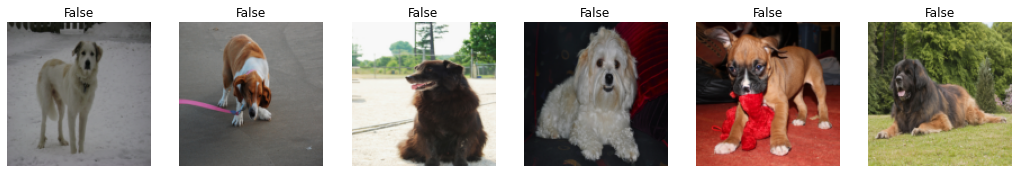

In [31]:
# Define a new DataBlock with resizing method to Squish
pets = pets.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = pets.dataloaders(path)

# Show a batch of 6 training images
dls.train.show_batch(max_n=6, nrows=1)

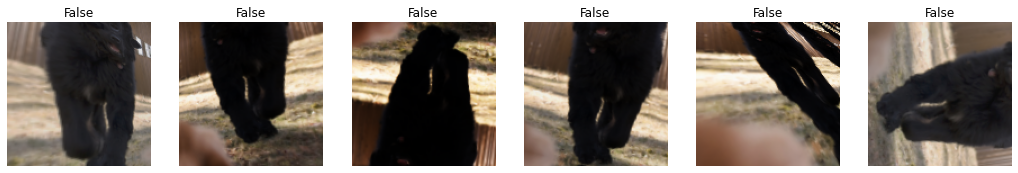

In [32]:
# Define a new DataBlock and add data augmentations
pets = pets.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2, flip_vert=True))
dls = pets.dataloaders(path)

# Show a batch of 6 training images
# Hint: use 'unique' param to view augmentations of one image
dls.train.show_batch(max_n=6, nrows=1, unique=True)

In [ ]:
path = untar_data(URLs.FOOD)

In [ ]:
path.ls()

In [ ]:
Normalize.from_stats(*imagenet_stats)

In [ ]:
food = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=1),
    get_y=parent_label,
    item_tfms=Resize(128),
    batch_tfms=[Normalize.from_stats(*imagenet_stats), *aug_transforms(flip_vert=True, max_rotate=90, max_warp=0.3, min_zoom=0.8, max_zoom=1.3, max_lighting=0.4)]
)

In [ ]:
dls = food.dataloaders(path/"images")

In [ ]:
dls.train.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

**Q:** Where to go next?

**A**: Go through [DataBlock tutorial](https://docs.fast.ai/tutorial.datablock.html) in docs to see examples with different data and problems.